# Netflix Data Visualizations

Author: Emily Padvorac

December 2020

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib
import pylab as pl
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set_style('white')


%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Data

### TV Shows and Movies listed on Netflix

This dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

[Link to dataset from kaggle](https://www.kaggle.com/shivamb/netflix-shows)

In [2]:
netflix = pd.read_csv("netflix_titles.csv")
print("Shape of Netflix dataset: ", netflix.shape)
netflix.head()

Shape of Netflix dataset:  (6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## 2. Data Cleaning

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
# Check for null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

- There are null values in director, cast, country, date_added, and rating columns.

- Drop director and cast from the dataframe as they are not relevant for this analysis.

In [5]:
netflix.drop(['director','cast'], axis = 1, inplace = True)
print("Shape of Netflix dataset: ", netflix.shape)
netflix.head(1)

Shape of Netflix dataset:  (6234, 10)


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


- Look at the value counts of the country column.  Since United States is the top value count, and that Netflix was created in the U.S., we will replace all of the nan values with United States.

In [6]:
netflix["country"].value_counts()

United States                                                     2032
India                                                              777
United Kingdom                                                     348
Japan                                                              176
Canada                                                             141
                                                                  ... 
France, United States, Canada                                        1
Venezuela                                                            1
Germany, France, Russia                                              1
Australia, New Zealand, United States                                1
Brazil, Netherlands, United States, Colombia, Austria, Germany       1
Name: country, Length: 554, dtype: int64

In [7]:
netflix['country'].replace(np.nan,"United States",
                           inplace = True)

- Create a new dataframe that has data added in one column, and extract the release month into another column.
- Take all of the "no" release month and replace it with 0.
- drop the date added column and then use pd.concat and merge the release month into the netflix dataframe

In [8]:
netflixDate = netflix[['date_added']].replace(np.nan,"No Date")
netflixDate['release_month'] = netflixDate['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflixDate.head()

,date_added,release_month
0,"September 9, 2019",September
1,"September 9, 2016",September
2,"September 8, 2018",September
3,"September 8, 2018",September
4,"September 8, 2017",September


In [9]:
netflixDate['release_month'].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
No            11
Name: release_month, dtype: int64

In [10]:
netflixDate['release_month'].replace('No',0, inplace = True)



In [11]:
netflixDate['release_month'].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
0             11
Name: release_month, dtype: int64

In [12]:
netflixDate.drop("date_added",axis=1,inplace=True)

In [13]:
netflix = pd.concat([netflix, netflixDate], axis = 1)
netflix.drop('date_added', axis = 1, inplace = True)
print("Shape of Netflix dataframe: ", netflix.shape)
netflix.head(1)

Shape of Netflix dataframe:  (6234, 10)


,show_id,type,title,country,release_year,rating,duration,listed_in,description,release_month
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September


- Look at the value counts for the rating column
- replace the nan values with TV-MA since that is the most common rating

In [14]:
netflix['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [15]:
netflix['rating'].isnull().sum()

10

In [16]:
netflix['rating'].replace(np.nan, 'TV-MA', inplace=True)

- check to see if the dataframe columns have any more nan values

In [17]:
netflix.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

## 3. Data Vis.

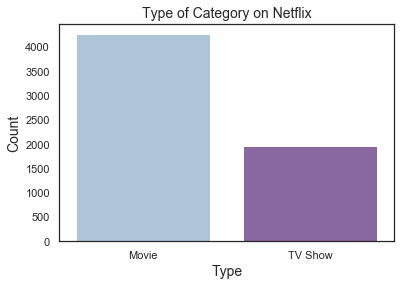

In [18]:
# plot of how many movies and tv shows on netflix
sns.set()
sns.set_style('white')
sns.countplot(x = 'type', data = netflix,
             palette ='BuPu')
plt.title('Type of Category on Netflix', size = 14)
plt.ylabel('Count', size = 14)
plt.xlabel('Type', size = 14)
plt.show()

#### Figure 1: Type of Category on Netflix

This figure displays the number of Movie/TV Shows on Netflix.  There are over 2000 more movies on Netflix compared to TV Shows.

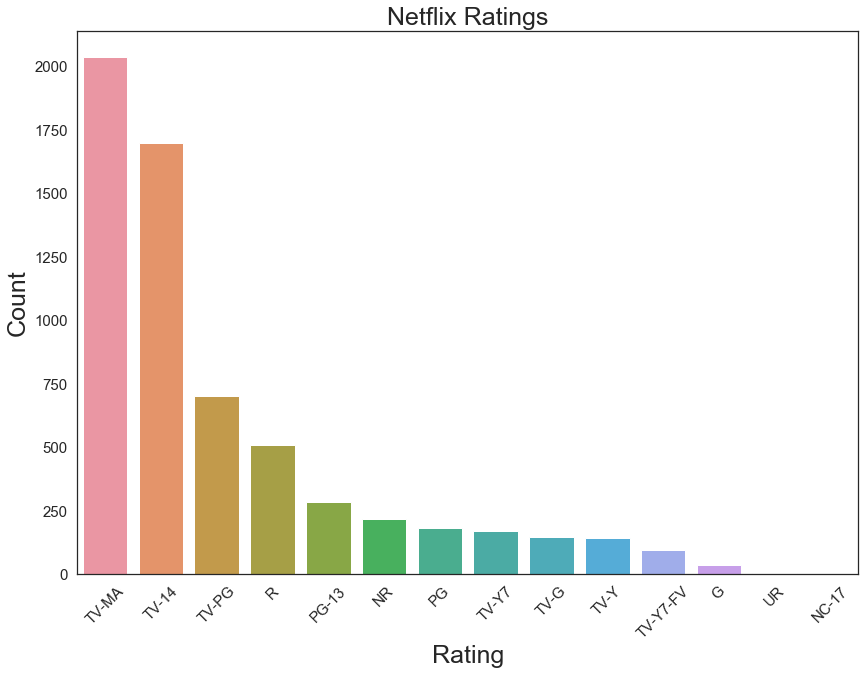

In [19]:
# plot of the different ratings on netflix
sns.set()
sns.set_style('white')
plt.figure(figsize = (14,10))
sns.countplot(x = 'rating', data = netflix, 
             order = netflix['rating'].value_counts().index[0:14
                                                           ])
plt.title('Netflix Ratings', size = 25)
plt.ylabel('Count', size = 25)
plt.xlabel('Rating', size = 25)
plt.xticks(rotation = 45, size = 15)
plt.yticks(size = 15)
plt.show()

#### Figure 2: Netflix Ratings

This figure displays the number of Ratings on Netflix.  TV-MA is the most common rating, followed by TV-14.

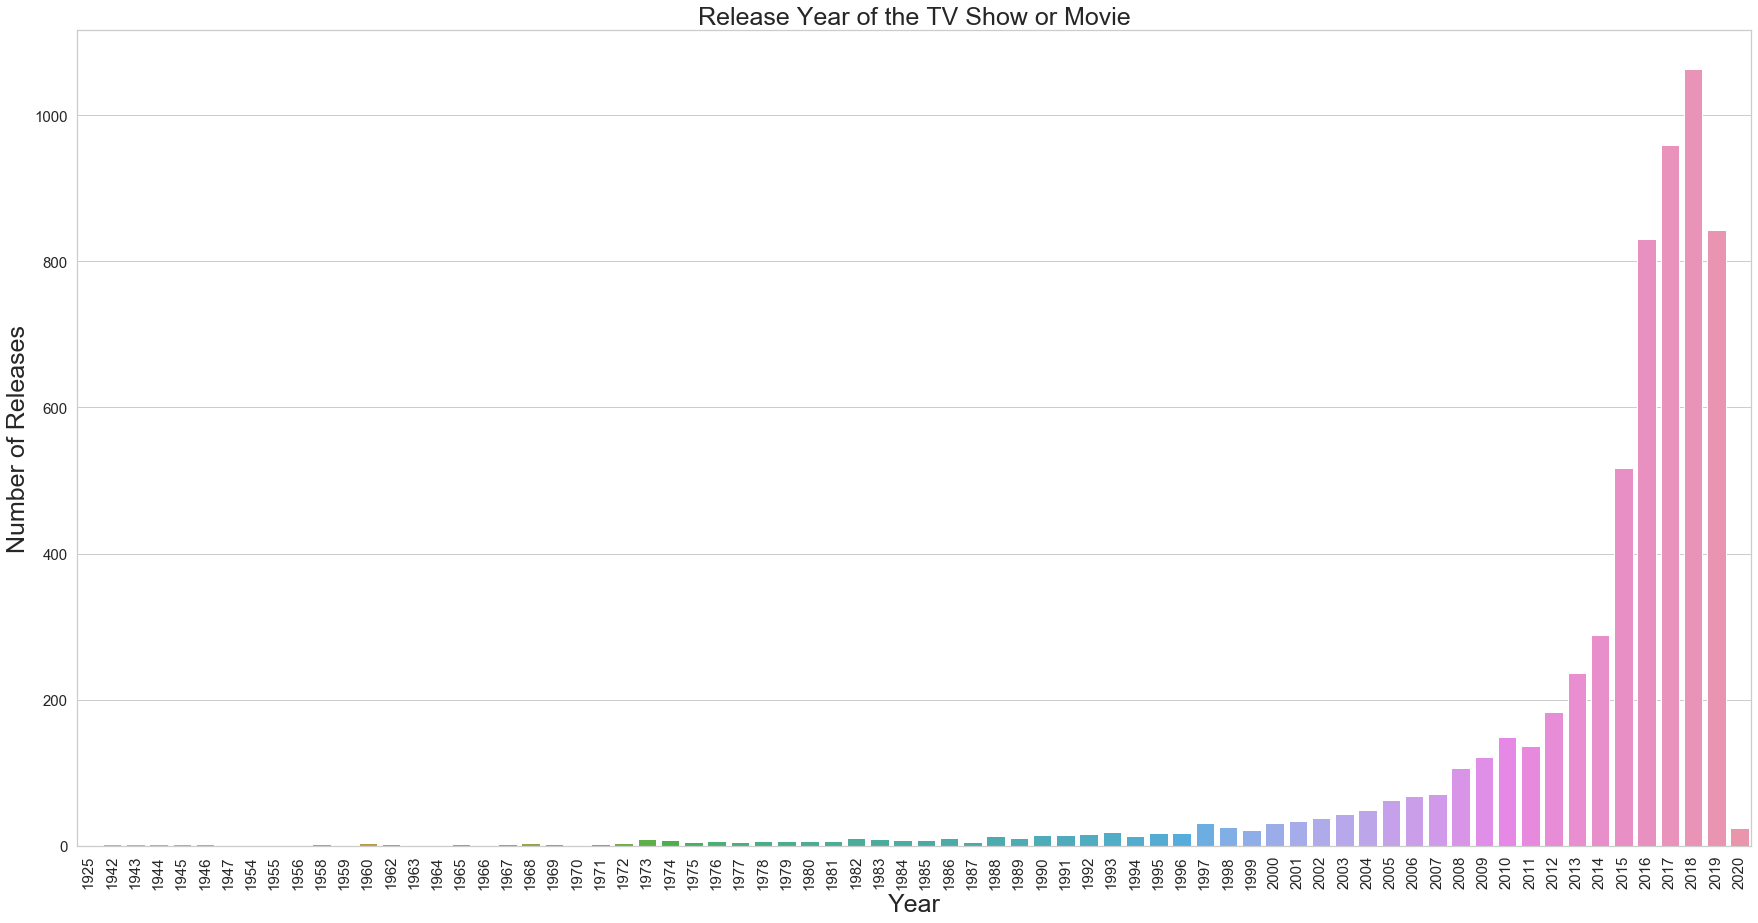

In [20]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize = (30,15))
sns.countplot(x = 'release_year', data = netflix)
plt.title('Release Year of the TV Show or Movie', 
          size = 25)
plt.ylabel('Number of Releases', size = 25)
plt.xlabel('Year', size = 25)
plt.xticks(rotation = 90, size = 15)
plt.yticks(size = 15)
plt.show()

#### Figure 3: Content Release Year

This figure displays the number of tv shows/movies based on what year they were released.  Most of the TV shows and movies on Netflix were released in the past 10 years.

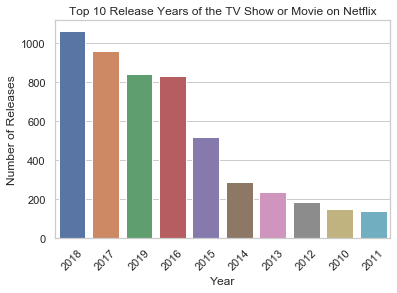

In [21]:
sns.set()
sns.set_style('whitegrid')
#plt.figure(figsize = (12,10))
sns.countplot(x='release_year', data = netflix,
             order = netflix['release_year'].value_counts().index[0:10])
plt.title('Top 10 Release Years of the TV Show or Movie on Netflix')
plt.ylabel('Number of Releases')
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.yticks()
plt.show()

#### Figure 4: Top 10 Content Release Years

This figure displays the top 10 years that have the most content released on Netflix.  The years 2016,2017,2018, and 2019 have the most content released.

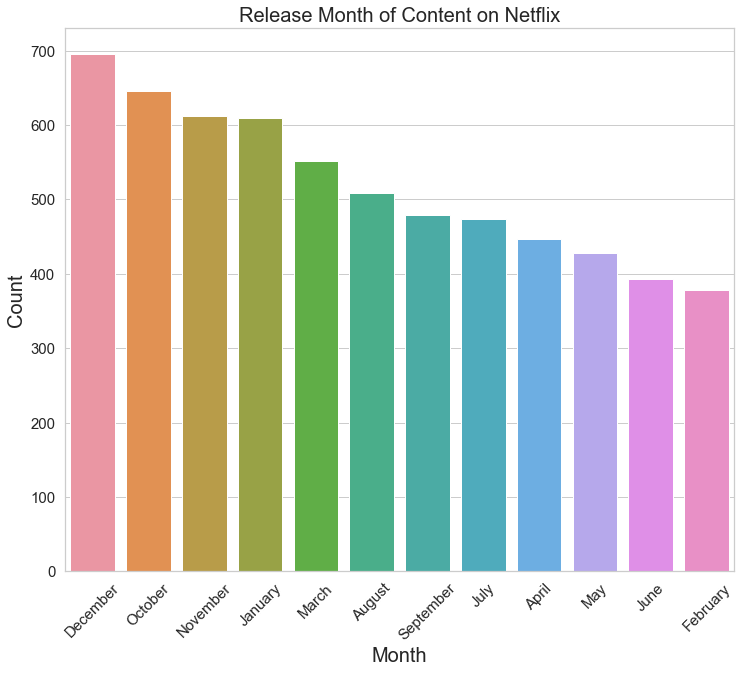

In [22]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize = (12, 10))
sns.countplot(x = 'release_month', data = netflix,
              order = netflix['release_month'].value_counts().index[0:12])
plt.title('Release Month of Content on Netflix',
          size = 20)
plt.ylabel('Count', size = 20)
plt.xlabel('Month', size = 20)
plt.xticks(rotation = 45, size = 15)
plt.yticks(size = 15)
plt.show()

#### Figure 5: Release Month of Content on Netflix

This figure displays the number of contents that are released on Netflix each month.  The most content is released in October, November, December, and January.

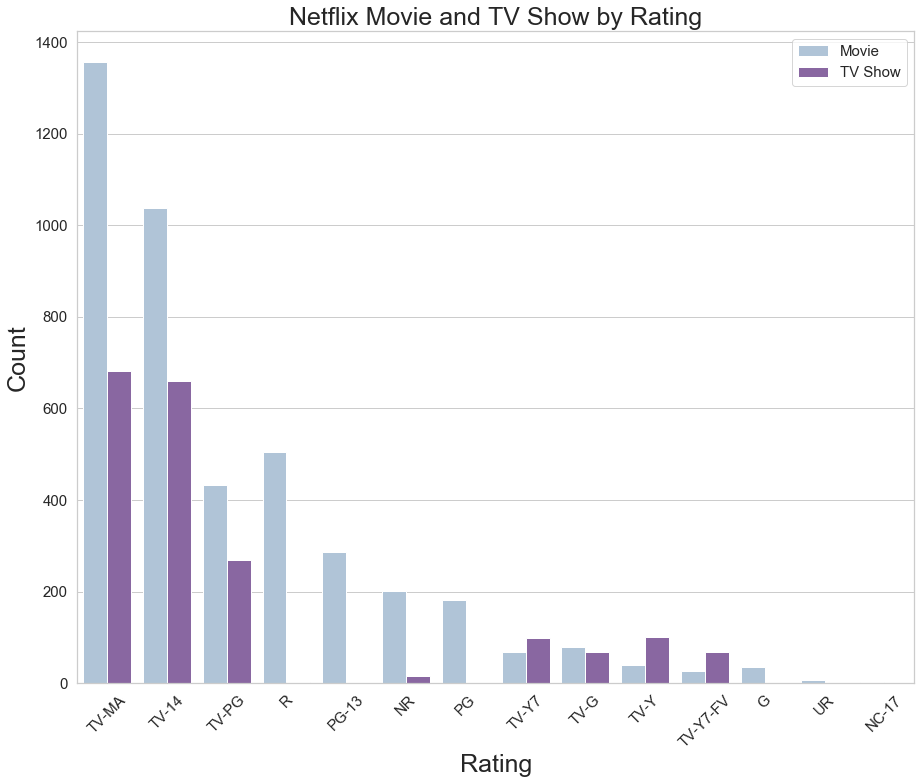

In [23]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize(15,12))
sns.countplot(x='rating', data = netflix, 
              hue ='type', 
              order = netflix['rating'].value_counts().
              index[0:14], palette = 'BuPu')
plt.title('Netflix Movie and TV Show by Rating', 
          size = 25)
plt.ylabel('Count', size = 25)
plt.xlabel('Rating', size = 25)
plt.xticks(rotation = 45, size = 15)
plt.yticks(size = 15)
plt.legend(loc = 'upper right', fontsize = 15)
plt.show()

#### Figure 6: Netflix Movie and TV Show by Rating

This figure displays the number of movie and TV shows for each rating category.  TV-MA and TV-14 are the top two rating categories for content on Netflix.

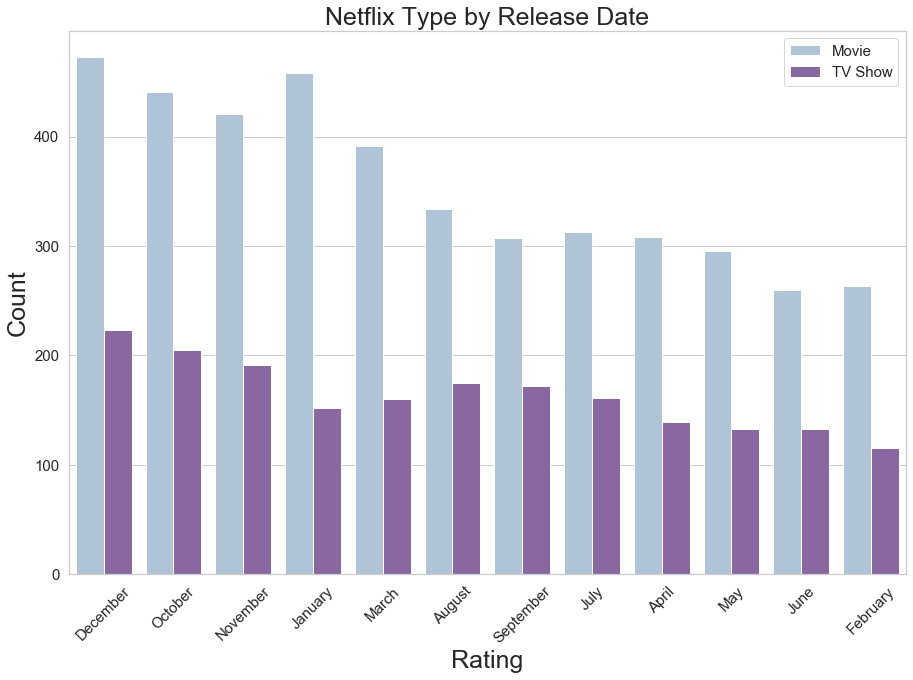

In [24]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize(15,10))
sns.countplot(x='release_month', data = netflix, 
              hue ='type', 
              order = netflix['release_month'].value_counts().
              index[0:12], palette = 'BuPu')
plt.title('Netflix Type by Release Date', size = 25)
plt.ylabel('Count', size = 25)
plt.xlabel('Rating', size = 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper right', fontsize = 15)
plt.show()

#### Figure 7: Netflix Movie and TV Show by Month

This figure displays the number of movie and TV shows released each month.  The most movies have been released on Netflix in December and January.  The most TV shows have been released on Netflix in October and December.

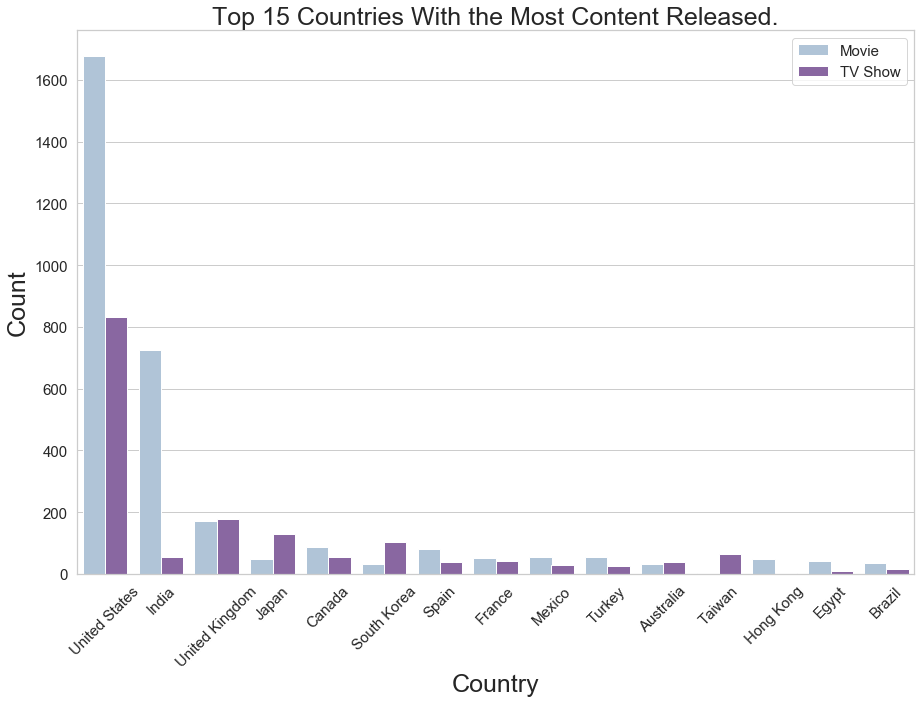

In [25]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize(15,10))
sns.countplot(x='country', data = netflix, 
              hue ='type', 
              order = netflix['country'].value_counts().
              index[0:15], palette = 'BuPu')
plt.title('Top 15 Countries With the Most Content Released.', size = 25)
plt.ylabel('Count', size = 25)
plt.xlabel('Country', size = 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper right', fontsize = 15)
plt.show()

#### Figure 8: Top 15 Countries With the Most Content Released.

This figure displays the number of movie and TV shows released in each country.  The United States and India lead in terms of movie released.  The United States and United Kingdom lead in TV releases.

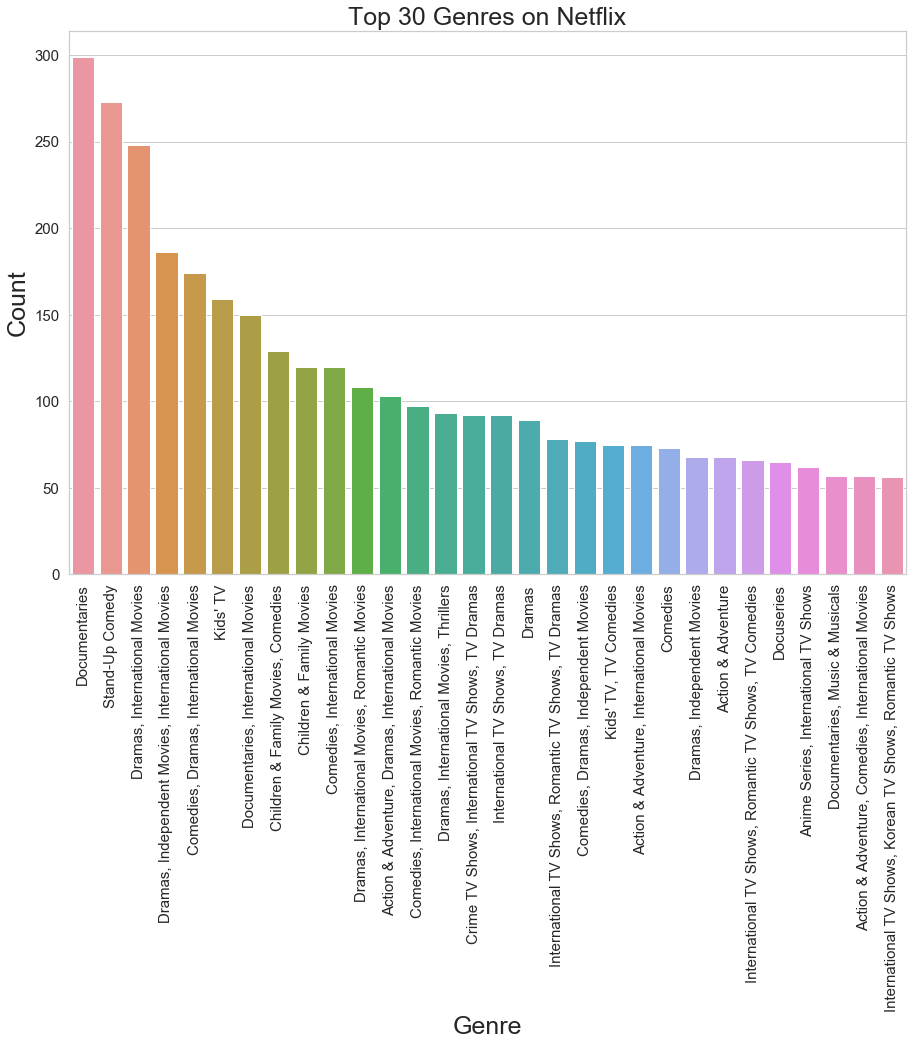

In [26]:
sns.set()
sns.set_style('whitegrid')
plt.figure(figsize(15,10))
sns.countplot(x='listed_in', data = netflix, 
              order = netflix['listed_in'].value_counts().
              index[0:30])
plt.title('Top 30 Genres on Netflix', size = 25)
plt.ylabel('Count', size = 25)
plt.xlabel('Genre', size = 25)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### Figure 9: Top 30 Genres on Netflix

This figure displays the top 30 genres on Netflix.  The top 3 genres are Documentaries, Stand-Up Comedy, and Dramas/International Movies,

In [27]:
# oldest movies on Netflix from released year

old = netflix.sort_values("release_year", ascending = True)
old = old[['title','country','type','release_year']]
old.head(25)

,title,country,type,release_year
4292,Pioneers: First Women Filmmakers*,United States,TV Show,1925
2011,Prelude to War,United States,Movie,1942
2013,The Battle of Midway,United States,Movie,1942
2022,Undercover: How to Operate Behind Enemy Lines,United States,Movie,1943
2023,Why We Fight: The Battle of Russia,United States,Movie,1943
2026,WWII: Report from the Aleutians,United States,Movie,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,United States,Movie,1944
2019,The Negro Soldier,United States,Movie,1944
2021,Tunisian Victory,"United States, United Kingdom",Movie,1944
2012,San Pietro,United States,Movie,1945


In [28]:
# Total number of movies and TV shows on netflix in each country
total = pd.DataFrame(netflix["country"].value_counts().
                       reset_index().values,columns=["Country","NumberOfShows"])
total.head()

,Country,NumberOfShows
0,United States,2508
1,India,777
2,United Kingdom,348
3,Japan,176
4,Canada,141


In [29]:
# Total number of movies and TV shows on netflix each year
total = pd.DataFrame(netflix["release_year"].value_counts().
                       reset_index().values,columns=["Year","NumberOfShows"])
total.head()

,Year,NumberOfShows
0,2018,1063
1,2017,959
2,2019,843
3,2016,830
4,2015,517


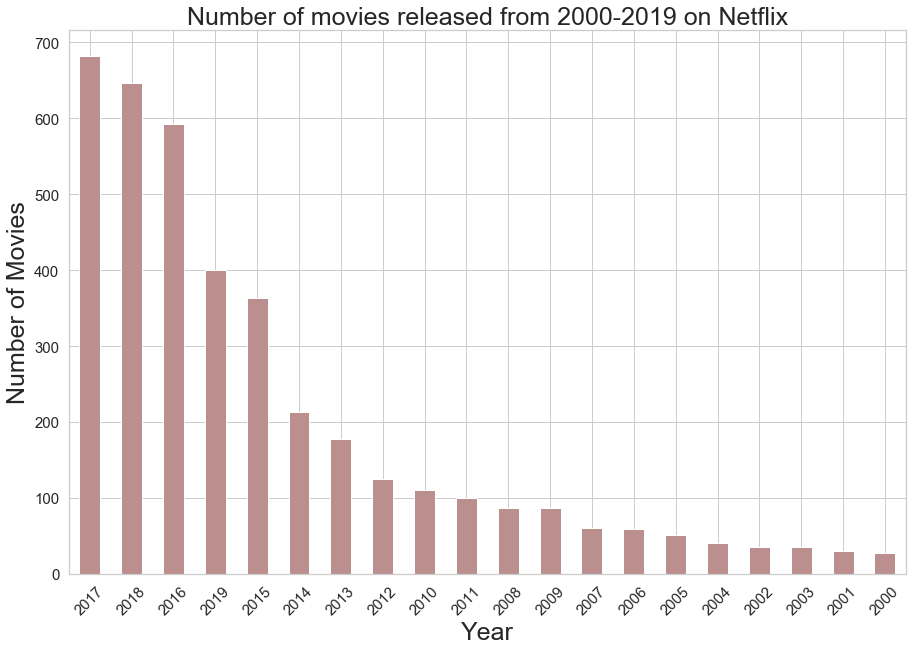

In [30]:
plt.figure(figsize = (15,10))
netflix[netflix['type']=='Movie']['release_year'].value_counts(
)[0:20].plot(kind = 'bar', color = 'rosybrown')
plt.title('Number of movies released from 2000-2019 on Netflix', 
          size = 25)
plt.ylabel('Number of Movies', size = 25)
plt.xlabel('Year', size = 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### Figure 10: Number of Movies Released from 2000-2019

This figure displays the number of movies on Netflix that came out between 2000-2019.  The top years for movie releases wre in 2016,2017,2018.

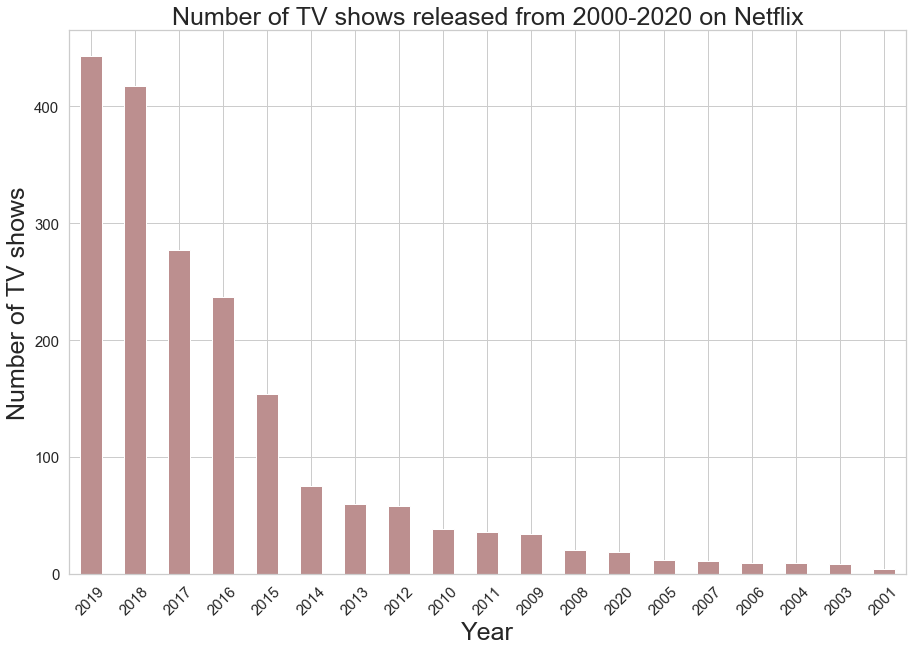

In [31]:
plt.figure(figsize = (15,10))
netflix[netflix['type']=='TV Show']['release_year'].value_counts(
)[0:19].plot(kind = 'bar', color = 'rosybrown')
plt.title('Number of TV shows released from 2000-2020 on Netflix', 
          size = 25)
plt.ylabel('Number of TV shows', size = 25)
plt.xlabel('Year', size = 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### Figure 11: Number of TV Shows Released from 2000-2019

This figure displays the number of TV shows on Netflix that came out between 2000-2019.  The top years for TV show releases wre in 2017,2018,2019.

- plot top 10 genres of Movies on Netflix
- plot top 10 genres of TV Shows on Netflix

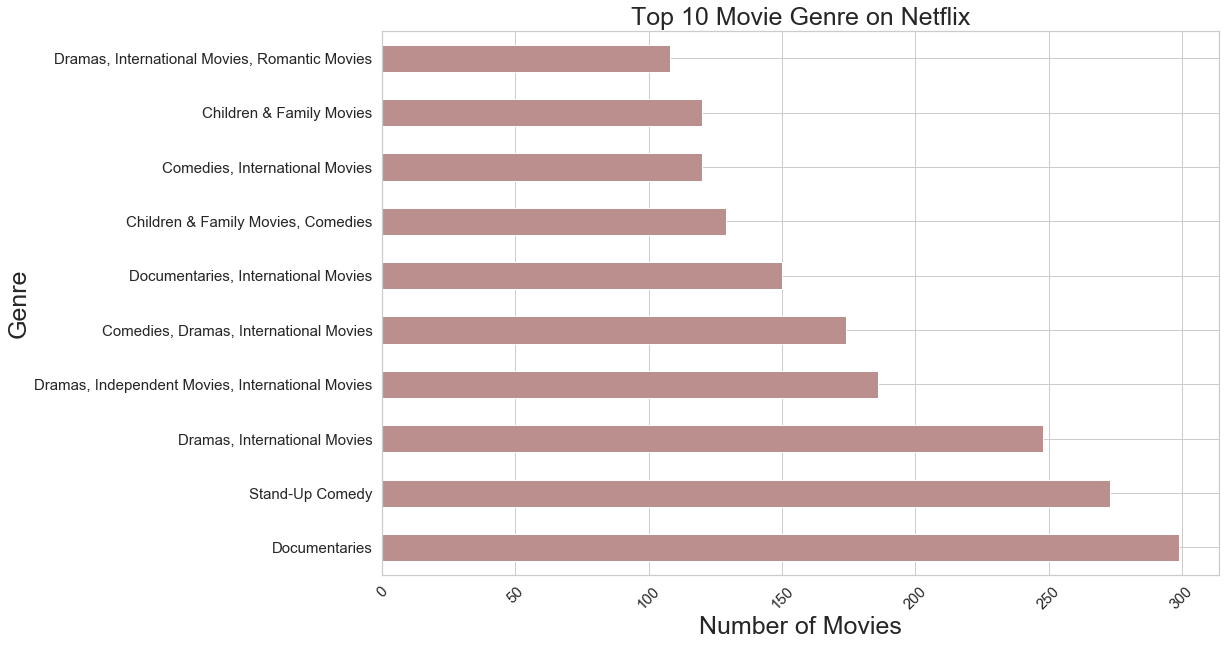

In [32]:
plt.figure(figsize = (15,10))
netflix[netflix['type']=='Movie']['listed_in'].value_counts(
)[0:10].plot(kind = 'barh', color = 'rosybrown')
plt.title('Top 10 Movie Genre on Netflix', 
          size = 25)
plt.ylabel('Genre', size = 25)
plt.xlabel('Number of Movies', size = 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### Figure 12: Top 10 Movie Genres on Netflix

This figure displays the top 10 movie genres released on Netflix.  The top genres are Documentaries, Stand-Up Comedy, and Drames/International Movies.

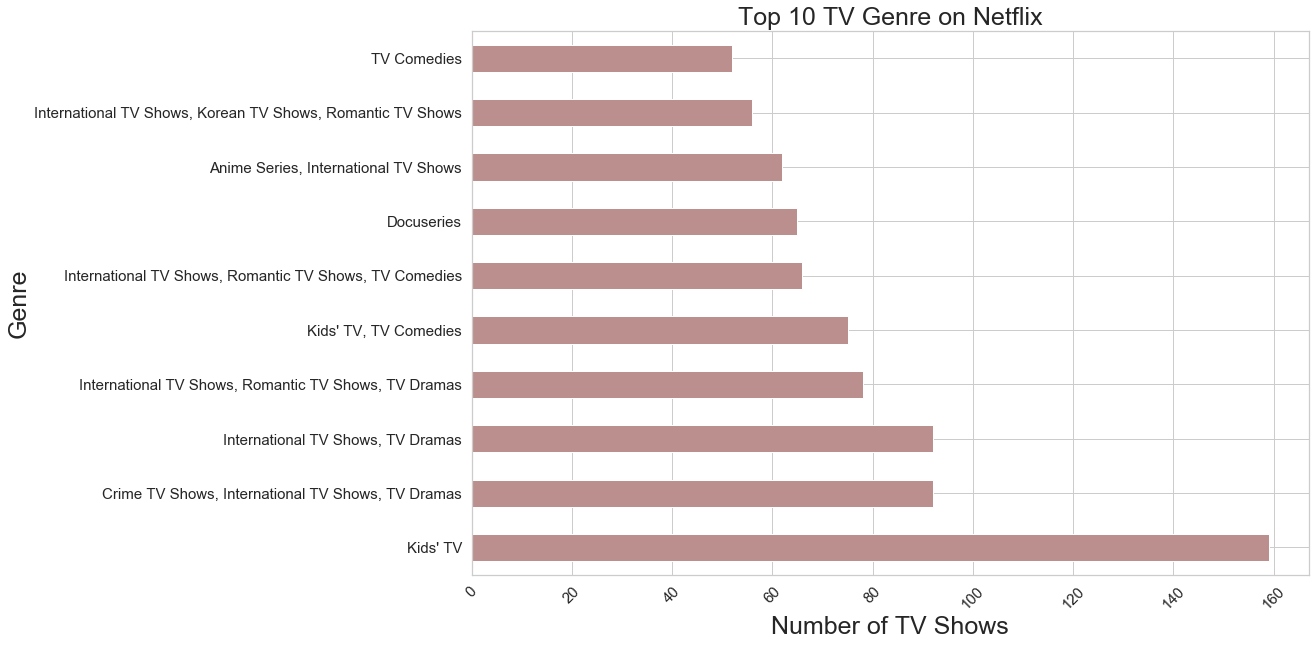

In [33]:
plt.figure(figsize = (15,10))
netflix[netflix['type']=='TV Show']['listed_in'].value_counts(
)[0:10].plot(kind = 'barh', color = 'rosybrown')
plt.title('Top 10 TV Genre on Netflix', 
          size = 25)
plt.ylabel('Genre', size = 25)
plt.xlabel('Number of TV Shows', size = 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

#### Figure 13: Top 10 TV Shows Genres on Netflix

This figure displays the top 10 TV show genres released on Netflix.  The top genres are Kids TV, Crime TV Shows, and International TV Shows.

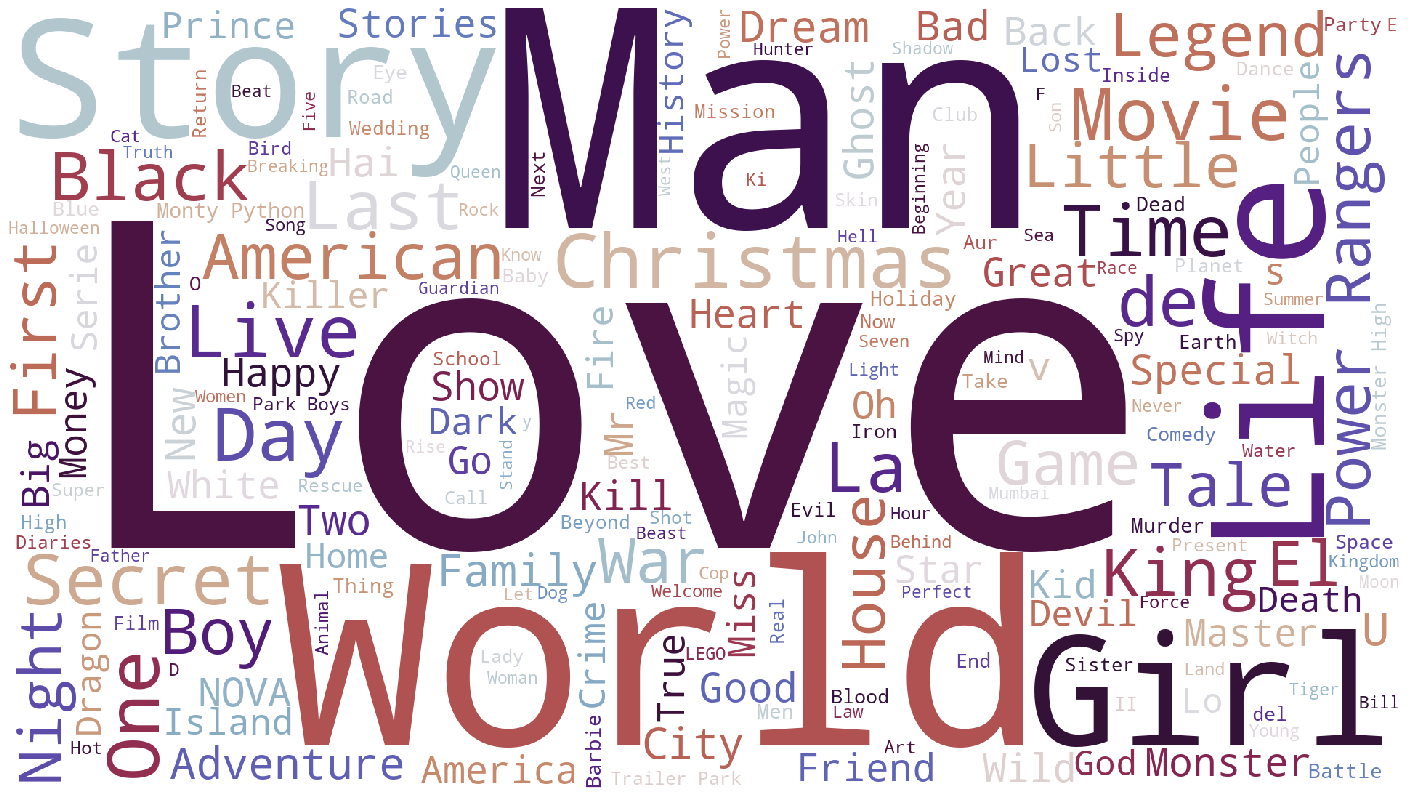

In [34]:
plt.figure(figsize = (25,15))
wordcloud = WordCloud(
                          background_color='White',
                          colormap = 'twilight',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Figure 14: Worldcloud for Netflix Titles

This figure displays the most common words used in titles on Netflix.  Some of the most common words in Netflix titles are love, story, world, life, and man.